<a href="https://colab.research.google.com/github/Aleksandra0001/DataScience/blob/main/HW_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В качестве домашнего задания вам предлагается создать нейронную сеть с помощью механизмов Keras, которая будет классифицировать товары из датасета fasion_mnist.

Вам предстоит предложить свою собственную архитектуру сети. Точность самой наивной, но адекватной нейросети составляет примерно 91%. Точность вашей модели должна быть не ниже этого показателя. Чтобы добиться таких значений вам понадобится поэкспериментировать с параметрами сети такими как: количество слоев, количество нейронов, функции активации, количество эпох, размер батча и т.д. Решение оформите в виде отдельного ноутбука.

In [47]:
from tensorflow import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [48]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

[]

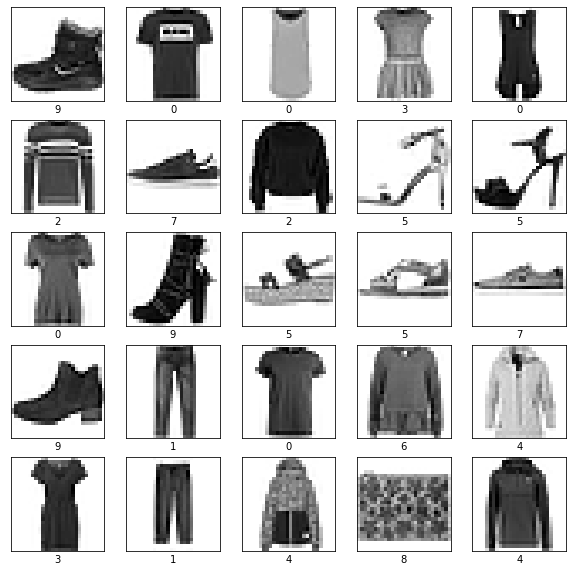

In [52]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
  plt.xticks([])
  plt.yticks([])
plt.plot()

# Model 1

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers, metrics, losses, utils

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation='tanh', name='First_dense'),
    Dense(512, activation='tanh', name='Second_dense'),
    Dense(10, activation='tanh', name='Prediction')
])

model.compile(
    optimizer="Adadelta",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [78]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 First_dense (Dense)         (None, 256)               200960    
                                                                 
 Second_dense (Dense)        (None, 512)               131584    
                                                                 
 Prediction (Dense)          (None, 10)                5130      
                                                                 
Total params: 337,674
Trainable params: 337,674
Non-trainable params: 0
_________________________________________________________________


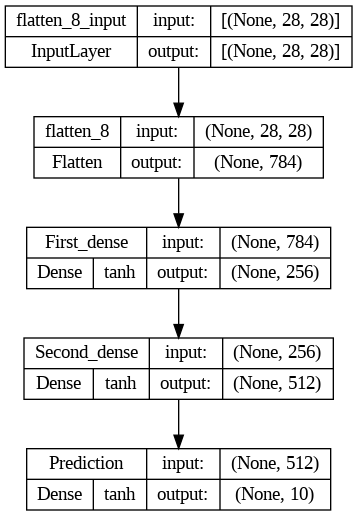

In [79]:
utils.plot_model(model, 'model.png', show_shapes=True, show_layer_activations=True)

In [82]:
history = model.fit(
    x_train, 
    y_train, 
    epochs=75,
    batch_size=256,
    validation_split=0.2
)

Epoch 1/75
188/188 [==============================] - 6s 31ms/step - loss: 1.8391 - accuracy: 0.4361 - val_loss: 1.8955 - val_accuracy: 0.4347
Epoch 2/75
188/188 [==============================] - 4s 23ms/step - loss: 1.8228 - accuracy: 0.4412 - val_loss: 1.8860 - val_accuracy: 0.4392
Epoch 3/75
188/188 [==============================] - 7s 38ms/step - loss: 1.8083 - accuracy: 0.4458 - val_loss: 1.8737 - val_accuracy: 0.4428
Epoch 4/75
188/188 [==============================] - 6s 32ms/step - loss: 1.7967 - accuracy: 0.4487 - val_loss: 1.8596 - val_accuracy: 0.4456
Epoch 5/75
188/188 [==============================] - 5s 28ms/step - loss: 1.7880 - accuracy: 0.4531 - val_loss: 1.8421 - val_accuracy: 0.4512
Epoch 6/75
188/188 [==============================] - 4s 23ms/step - loss: 1.7763 - accuracy: 0.4569 - val_loss: 1.8263 - val_accuracy: 0.4539
Epoch 7/75
188/188 [==============================] - 5s 25ms/step - loss: 1.7670 - accuracy: 0.4601 - val_loss: 1.8145 - val_accuracy: 0.4574

In [87]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

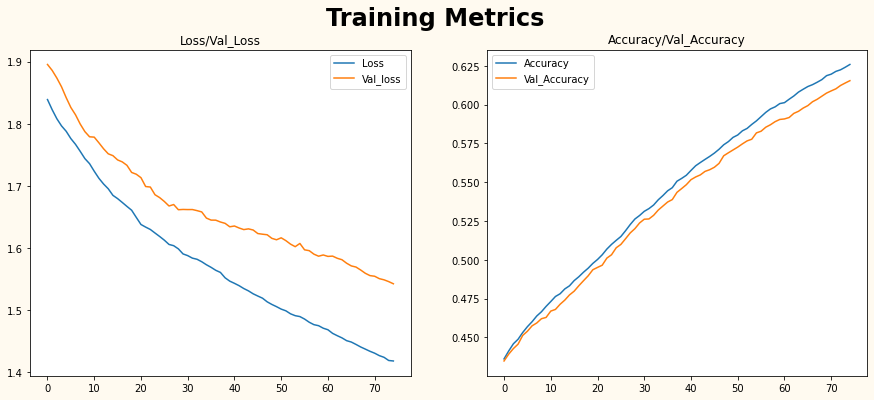

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Training Metrics', fontsize=24, fontweight='bold')
fig.set_facecolor('floralwhite')

axes[0].set_title('Loss/Val_Loss')
axes[0].plot(history.history['loss'], label='Loss')
axes[0].plot(history.history['val_loss'], label='Val_loss')
axes[0].legend()

axes[1].set_title('Accuracy/Val_Accuracy')
axes[1].plot(history.history['accuracy'], label='Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Val_Accuracy')
axes[1].legend()

plt.show()

In [106]:
loss_test, acc_test = model.evaluate(x_test, y_test)
print(f'Loss Test: {loss_test}, Accuracy Test: {acc_test}')

313/313 [==============================] - 1s 4ms/step - loss: 1.6390 - accuracy: 0.6133
Loss Test: 1.6390259265899658, Accuracy Test: 0.6133000254631042


313/313 [==============================] - 2s 7ms/step
Prediction: 3
Actual: 3


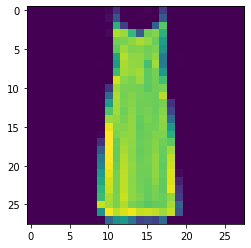

In [122]:
pred = model.predict(x_test)
print(f'Prediction: {np.argmax(pred[13])}')
print(f'Actual: {y_test[13]}')

plt.figure()
plt.imshow(x_test[13]);

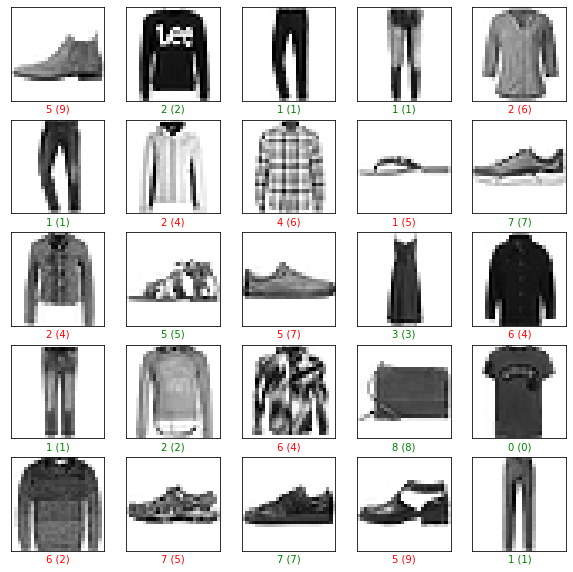

In [127]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(pred[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = "green"
    else:
        color = "red"
    plt.xlabel("{} ({})".format(predicted_label, true_label), color=color)
    
plt.show()

# Model 2

In [166]:
model_2 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu', name='First_dense'),
    Dense(128, activation='relu', name='Second_dense'),
    Dense(128, activation='relu', name='Third_dense'),
    Dense(10, activation='softmax', name='Prediction')
])

model_2.compile(
    optimizer="Adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [167]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 First_dense (Dense)         (None, 128)               100480    
                                                                 
 Second_dense (Dense)        (None, 128)               16512     
                                                                 
 Third_dense (Dense)         (None, 128)               16512     
                                                                 
 Prediction (Dense)          (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


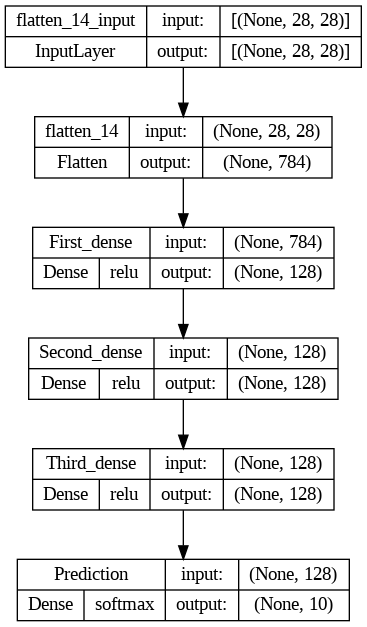

In [168]:
utils.plot_model(model_2, 'model_2.png', show_shapes=True, show_layer_activations=True)

In [169]:
history_2 = model_2.fit(
    x_train, 
    y_train, 
    epochs=20,
    batch_size=256,
    validation_split=0.2,
    verbose=2
)

Epoch 1/20
188/188 - 3s - loss: 4.2751 - accuracy: 0.7026 - val_loss: 1.1526 - val_accuracy: 0.7683 - 3s/epoch - 17ms/step
Epoch 2/20
188/188 - 2s - loss: 0.8624 - accuracy: 0.7823 - val_loss: 0.7247 - val_accuracy: 0.7960 - 2s/epoch - 11ms/step
Epoch 3/20
188/188 - 3s - loss: 0.6181 - accuracy: 0.8106 - val_loss: 0.6207 - val_accuracy: 0.8086 - 3s/epoch - 14ms/step
Epoch 4/20
188/188 - 2s - loss: 0.5305 - accuracy: 0.8266 - val_loss: 0.5983 - val_accuracy: 0.8115 - 2s/epoch - 12ms/step
Epoch 5/20
188/188 - 2s - loss: 0.4812 - accuracy: 0.8361 - val_loss: 0.5968 - val_accuracy: 0.8171 - 2s/epoch - 11ms/step
Epoch 6/20
188/188 - 2s - loss: 0.4473 - accuracy: 0.8462 - val_loss: 0.5305 - val_accuracy: 0.8278 - 2s/epoch - 10ms/step
Epoch 7/20
188/188 - 2s - loss: 0.4046 - accuracy: 0.8564 - val_loss: 0.4836 - val_accuracy: 0.8407 - 2s/epoch - 10ms/step
Epoch 8/20
188/188 - 2s - loss: 0.3720 - accuracy: 0.8659 - val_loss: 0.5130 - val_accuracy: 0.8373 - 2s/epoch - 9ms/step
Epoch 9/20
188/18

In [170]:
history_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

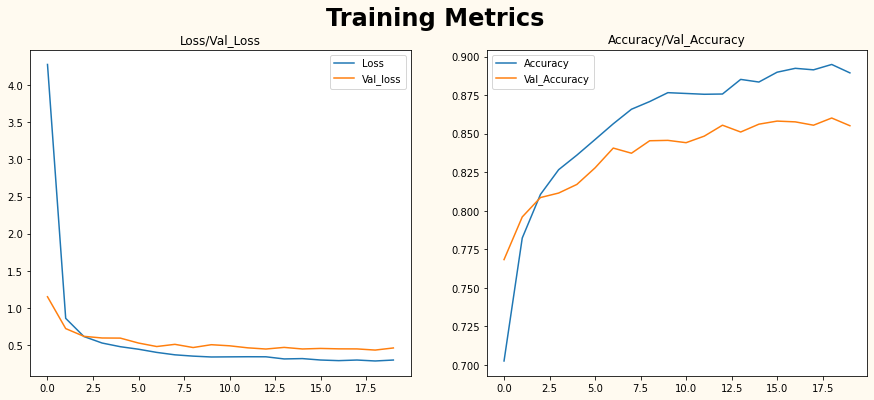

In [171]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Training Metrics', fontsize=24, fontweight='bold')
fig.set_facecolor('floralwhite')

axes[0].set_title('Loss/Val_Loss')
axes[0].plot(history_2.history['loss'], label='Loss')
axes[0].plot(history_2.history['val_loss'], label='Val_loss')
axes[0].legend()

axes[1].set_title('Accuracy/Val_Accuracy')
axes[1].plot(history_2.history['accuracy'], label='Accuracy')
axes[1].plot(history_2.history['val_accuracy'], label='Val_Accuracy')
axes[1].legend()

plt.show()

In [172]:
loss_test_2, acc_test_2 = model_2.evaluate(x_test, y_test)
print(f'Loss Test: {loss_test_2}, Accuracy Test: {acc_test_2}')

313/313 [==============================] - 1s 2ms/step - loss: 0.5120 - accuracy: 0.8478
Loss Test: 0.5120278596878052, Accuracy Test: 0.8478000164031982


In [173]:
pred_2 = model_2.predict(x_test)

313/313 [==============================] - 1s 4ms/step


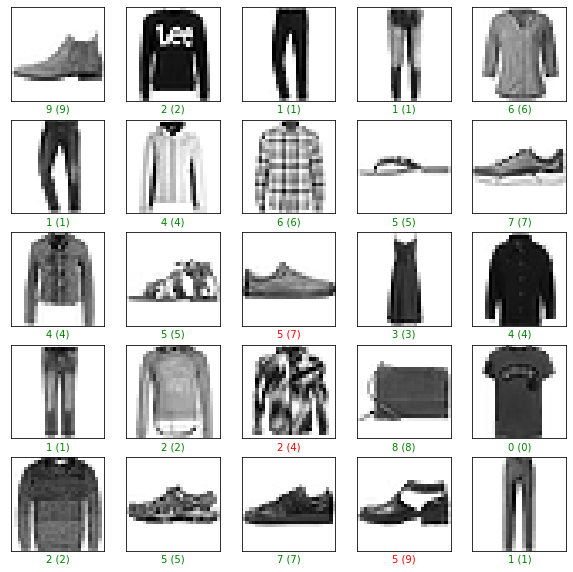

In [177]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label_2 = np.argmax(pred_2[i])
    true_label_2 = y_test[i]
    if predicted_label_2 == true_label_2:
        color = "green"
    else:
        color = "red"
    plt.xlabel("{} ({})".format(predicted_label_2, true_label_2), color=color)
    
plt.show()

# Model 3

In [102]:
model_3 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu', name='First_dense'),
    Dense(128, activation='relu', name='Second_dense'),
    Dense(10, activation='softmax', name='Prediction')
])

model_3.compile(
    optimizer="Nadam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [103]:
model_3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 First_dense (Dense)         (None, 128)               100480    
                                                                 
 Second_dense (Dense)        (None, 128)               16512     
                                                                 
 Prediction (Dense)          (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


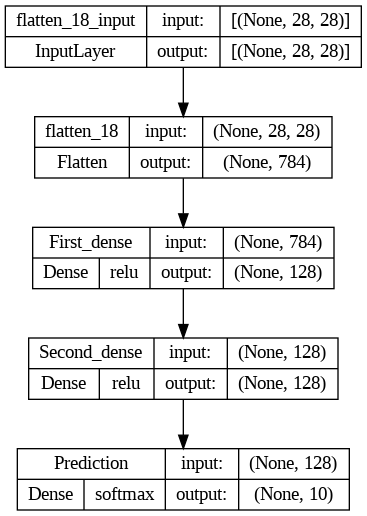

In [104]:
utils.plot_model(model_3, 'model_3.png', show_shapes=True, show_layer_activations=True)

In [105]:
history_3 = model_3.fit(
    x_train, 
    y_train, 
    epochs=35,
    batch_size=256,
    validation_split=0.2,
    verbose=2
)

Epoch 1/35
188/188 - 3s - loss: 6.5793 - accuracy: 0.7200 - val_loss: 2.1466 - val_accuracy: 0.7627 - 3s/epoch - 16ms/step
Epoch 2/35
188/188 - 2s - loss: 1.4550 - accuracy: 0.7921 - val_loss: 1.3405 - val_accuracy: 0.7915 - 2s/epoch - 12ms/step
Epoch 3/35
188/188 - 2s - loss: 0.9125 - accuracy: 0.8117 - val_loss: 0.9908 - val_accuracy: 0.8195 - 2s/epoch - 11ms/step
Epoch 4/35
188/188 - 2s - loss: 0.6786 - accuracy: 0.8278 - val_loss: 0.7730 - val_accuracy: 0.8234 - 2s/epoch - 9ms/step
Epoch 5/35
188/188 - 1s - loss: 0.5627 - accuracy: 0.8401 - val_loss: 0.7581 - val_accuracy: 0.8167 - 1s/epoch - 8ms/step
Epoch 6/35
188/188 - 2s - loss: 0.4837 - accuracy: 0.8523 - val_loss: 0.7017 - val_accuracy: 0.8178 - 2s/epoch - 9ms/step
Epoch 7/35
188/188 - 2s - loss: 0.4381 - accuracy: 0.8582 - val_loss: 0.6948 - val_accuracy: 0.8165 - 2s/epoch - 9ms/step
Epoch 8/35
188/188 - 2s - loss: 0.4093 - accuracy: 0.8631 - val_loss: 0.6157 - val_accuracy: 0.8407 - 2s/epoch - 9ms/step
Epoch 9/35
188/188 - 

In [106]:
history_3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

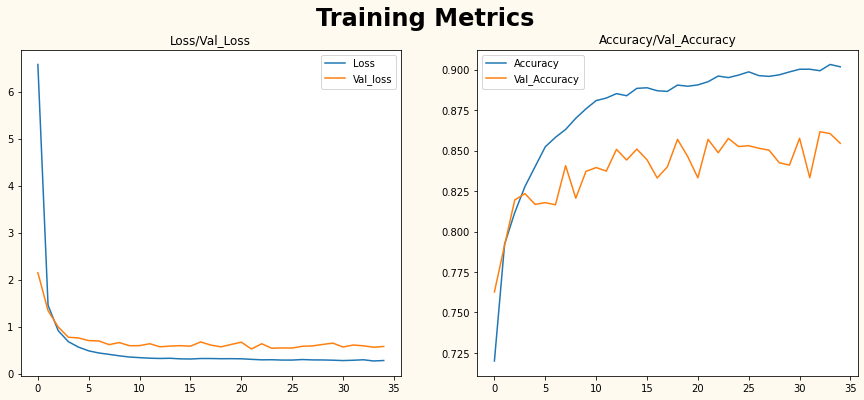

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Training Metrics', fontsize=24, fontweight='bold')
fig.set_facecolor('floralwhite')

axes[0].set_title('Loss/Val_Loss')
axes[0].plot(history_3.history['loss'], label='Loss')
axes[0].plot(history_3.history['val_loss'], label='Val_loss')
axes[0].legend()

axes[1].set_title('Accuracy/Val_Accuracy')
axes[1].plot(history_3.history['accuracy'], label='Accuracy')
axes[1].plot(history_3.history['val_accuracy'], label='Val_Accuracy')
axes[1].legend()

plt.show()

In [108]:
loss_test_3, acc_test_3 = model_3.evaluate(x_test, y_test)
print(f'Loss Test: {loss_test_3}, Accuracy Test: {acc_test_3}')

313/313 [==============================] - 1s 2ms/step - loss: 0.6209 - accuracy: 0.8509
Loss Test: 0.6209406852722168, Accuracy Test: 0.8508999943733215


In [109]:
pred_3 = model_3.predict(x_test)

313/313 [==============================] - 1s 2ms/step


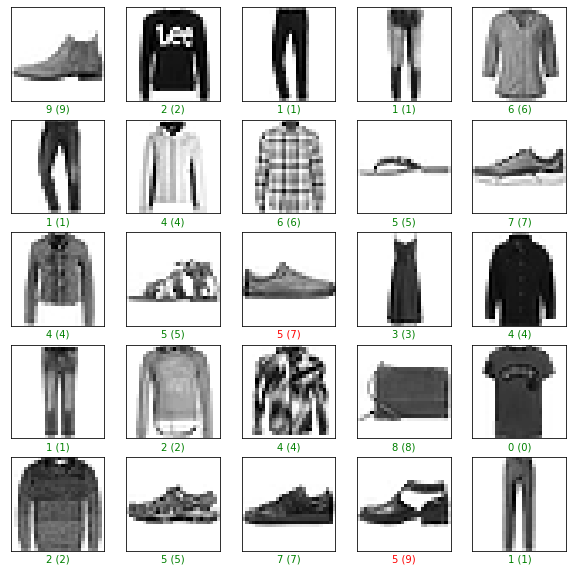

In [110]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label_3 = np.argmax(pred_3[i])
    true_label_3 = y_test[i]
    if predicted_label_3 == true_label_3:
        color = "green"
    else:
        color = "red"
    plt.xlabel("{} ({})".format(predicted_label_3, true_label_3), color=color)
    
plt.show()